## Load Libs

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch 
import torchvision
from PIL import Image
import json
import datetime

## Preprocess images from folder to numpy object

In [6]:
import os


data_dir = "C:\\Users\\Simas\\Documents\\Github\\RoofNet"
data_type = "val"
img_dir = data_dir+"\\data\\"+data_type+"\\"
imgs = {}
def read_image_pil(path):
    img = Image.open(path)
    o_img = img.copy()
    img = img.crop((64,0,448,384))
    img.thumbnail((64, 64), Image.ANTIALIAS)
    img = np.array(img)#[:32,:]
    # take rgb instead of rgba
    img = img[:,:,:3]
    return o_img,img
        
for subdir, dirs, _ in os.walk(img_dir):
    for d in dirs:
        paths = subdir + d + '/'
        metajson = paths+'metadata.json'
        with open(metajson) as f:
            meta = json.load(f)
            #issue = meta['reroof_permit_issue_date']
            #expiration = meta['reroof_permit_expiration_date']
            address = meta['address']
            trans_year = meta['new_roof_year']
            if trans_year == None:
                trans_year = 0
            key = hash(address)
        trans_file = paths+"\\transition.txt"
        #if os.path.isfile(trans_file):
        #    trans_year = int(open(trans_file).read())
        #else:
        #    trans_year = 0
        #imgs[address]={'imgs':[],'years':[],'issue':[],'expiration':[],'address':[],'trans_year':[]}
        imgs[address]={'imgs':[],'years':[],'address':[],'trans_year':[]}
        print('address',address)
        for _, _, files in os.walk(paths):
            for i,file in enumerate(files):
                if 'png' in file:
                    print('loading',i,file)
                    _,img = read_image_pil(paths + file)
                    imgs[address]['years'].append(int(file[:-4]))
                    imgs[address]['imgs'].append(img)
                    #imgs[address]['issue']= issue
                    #imgs[address]['expiration'] = expiration
                    imgs[address]['address'] = address
                    imgs[address]['trans_year'] = int(trans_year)
            
    if '' in imgs:
        del imgs['']


address 10578 Science Center Dr, San Diego, CA 92121, USA
loading 0 2012.png
loading 1 2013.png
loading 2 2014.png
loading 3 2015.png
loading 4 2016.png
loading 5 2017.png
loading 6 2018.png
address 10895 Thornmint Rd, San Diego, CA 92127, USA
loading 0 2012.png
loading 1 2013.png
loading 2 2014.png
loading 3 2015.png
loading 4 2016.png
loading 5 2017.png
loading 6 2018.png
address 1320 Air Wing Rd, San Diego, CA 92154, USA
loading 0 2012.png
loading 1 2013.png
loading 2 2014.png
loading 3 2015.png
loading 4 2016.png
loading 5 2017.png
loading 6 2018.png
address 1420 240th St, Harbor City, CA 90710, USA
loading 0 2012.png
loading 1 2013.png
loading 2 2014.png
loading 3 2015.png
loading 4 2016.png
loading 5 2017.png
loading 6 2018.png
address 1470 Exposition Way, San Diego, CA 92154, USA
loading 0 2012.png
loading 1 2013.png
loading 2 2014.png
loading 3 2015.png
loading 4 2016.png
loading 5 2017.png
loading 6 2018.png
address 15321 S Figueroa St, Gardena, CA 90248, USA
loading 0 2012.pn

## Save and load

In [7]:
imgs = {'data':imgs}
name = data_type.replace('\\','_')
name += '_64_noreroofs'
np.save(name,imgs)

In [84]:
dataset = np.load('/home/misha/research/qrithm/roofnet/data/' + 'labeled_dataset.npy',allow_pickle=True)
dataset = dataset.item().get('data')

In [90]:
from roofnet.utils.data import ImageDataset, TripletBuildingSampler
from torchvision.transforms import transforms 

data_file_path = '/home/misha/research/qrithm/roofnet/data/labeled_dataset.npy'
data = ImageDataset(data_file_path, 
                    transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(
                                    (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                            ]))


NameError: name 'transform_chain' is not defined

In [88]:
from datetime import datetime
from torchvision.utils import make_grid

#sampler = TripletBuildingSampler(data,batch_size=1)
loader = torch.utils.data.DataLoader(data,batch_size=7)
loader = iter(loader)


img shape: [3, 64, 64] 
img year: 2012 
transition year: 2017 
address: 4020 Paloma St, Los Angeles, CA 90011, USA
img shape: [3, 64, 64] 
img year: 2013 
transition year: 2017 
address: 4020 Paloma St, Los Angeles, CA 90011, USA
img shape: [3, 64, 64] 
img year: 2014 
transition year: 2017 
address: 4020 Paloma St, Los Angeles, CA 90011, USA
img shape: [3, 64, 64] 
img year: 2015 
transition year: 2017 
address: 4020 Paloma St, Los Angeles, CA 90011, USA
img shape: [3, 64, 64] 
img year: 2016 
transition year: 2017 
address: 4020 Paloma St, Los Angeles, CA 90011, USA
img shape: [3, 64, 64] 
img year: 2017 
transition year: 2017 
address: 4020 Paloma St, Los Angeles, CA 90011, USA
img shape: [3, 64, 64] 
img year: 2018 
transition year: 2017 
address: 4020 Paloma St, Los Angeles, CA 90011, USA


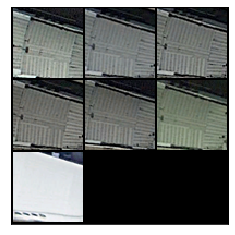

In [89]:
x,y,meta = next(loader)
for i in range(len(y)):
    print('='*20)
    print('img shape:',[n for n in x[i].shape],'\nimg year:',y[i].item(),'\ntransition year:',meta['transition_year'][i].item(),'\naddress:',meta['address'][i])
    
def display_image_grid(x,nrow=8):
    x = (x.cpu().detach()+1.0)*0.5
    x = make_grid(x,nrow=nrow)
    x = x.numpy()
    fig = plt.imshow(np.transpose(x, (1,2,0)), interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    
    
display_image_grid(x[:len(y),:,:,:],nrow=3)
